<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/llm0to1/02_positional_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. We firs initialize matrix of shape max_seq_len and embedding_dim

2. Position is the col vector of sequence

3. `div_term` is scaling factor, ensuring encoded values change with different frequencies.

4. For even indices, apply formula for sine. For odd, with cos. This all gives a (max_seq_len, embedding_dim) matrix with unique sine/cos patterns for each pos..

5. `forward` takes token embeddings and add positional encodings `self.pe`

6. If cat -> 0.1, 0.2, 0.5, 07 and its positional encoding is 0.1, 0.05, 0.2, 0.01, the resulting vector would be 0.3, 0.55, 0.77, 0.11

7. Without using this positional encoding, model won't understand word order.

In [ ]:
import torch
import math

class PositionalEncoding(torch.nn.Module):
  def __init__(self, embedding_dim, max_seq_len):
    super(PositionalEncoding, self).__init__()

    # matrix to store positional encodings
    pe = torch.zeros(max_seq_len, embedding_dim)
    print("pe is", pe)

    position = torch.arange(0, max_seq_len,
                            dtype=torch.float).unsqueeze(1)
    print("position is", position)

    # Define frequence terms for sine and cosine
    div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0) / embedding_dim))

    # Apply sine to even indices and cosine to odd indices
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)

    print("pe now is", pe)

    self.pe = pe.unsqueeze(0) # with shape (1, max_seq_len, embedding dimension)
    print("finally pe is", self.pe)

  def forward(self, x):
    return x + self.pe[:, :x.size(1), :]

embedding_dim = 16
max_seq_len = 50

positional_encoder = PositionalEncoding(embedding_dim, max_seq_len)

dummy_embeddings = torch.zeros((1, max_seq_len, embedding_dim))  # Batch size = 1

output = positional_encoder(dummy_embeddings)

print("Positional Encodings Shape:", output.shape)
print("First Token's Encoding:", output[0, 0, :])


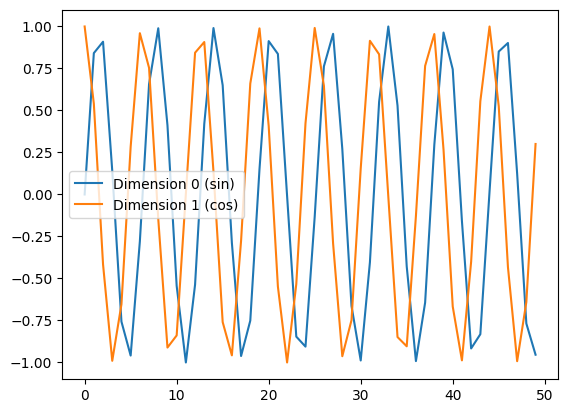

In [12]:
import matplotlib.pyplot as plt
plt.plot(positional_encoder.pe[0, :, 0].numpy(), label='Dimension 0 (sin)')
plt.plot(positional_encoder.pe[0, :, 1].numpy(), label='Dimension 1 (cos)')
plt.legend()
plt.show()